# Final Exam

- Alberto Daniel Quiroga Villalobos
- 25550047

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Q1 k-Nearest Neighbor

Use the dataset churn.csv to complete the following tasks with Python. 
Codes and outputs should be clear
Round numerical results to 3 decimal places

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

### A) select column 2 to 7 as features and the last column (leave) as target variable. check the statistical summary for all features 

- note: do not record the target variable as numbers

In [169]:
churn = pd.read_csv('churn.csv', sep = ' ')
features = churn.iloc[:, 2:8]
target = churn.iloc[:, -1]
features.describe().round(3)

,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,85.980,23.899,493155.264,389.615,8.001,6.002
std,85.992,26.817,252407.885,213.821,8.925,4.403
min,-2.000,0.000,150002.000,130.000,0.000,1.000
25%,0.000,0.000,263714.250,219.000,1.000,2.000
50%,59.000,14.000,452259.500,326.000,4.000,5.000
75%,179.000,41.000,702378.000,533.250,15.000,10.000
max,335.000,89.000,999996.000,899.000,29.000,15.000


### B) Split the data into train set (70%) and test set (30%), with random state as 2025. Scale the features by standarizing them. After standarization, display the mean and standard deviation of the scaled test features.

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=2025)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Mean of scaled test features:", X_test_scaled.mean(axis=0).round(3))
print("Standard deviation of scaled test features:", X_test_scaled.std(axis=0).round(3))

Mean of scaled test features: [ 0.019 -0.01   0.016 -0.021  0.003 -0.008]
Standard deviation of scaled test features: [1.006 0.989 0.998 0.988 0.999 0.987]


#### Why is their mean value not 0 and the standard deviation not 1?

- Answer: Because the scaler used the training data only (no data leakage) making it a very likely posibility that some outliers where in the test data

### C) Create a sequence of 20 numbers evenly spaced between 5 (inclusive) and 100 (inclusive), with step size at 5. Apply grid Search with 5-fold cross-validation to the training set to find the best k value from the sequence. 

What is the best k value found?

What is the average generalization performance for the best k value?

- (note: use accuracy for model evaluation)

In [171]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(5, 105, 5)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_score = round(grid_search.best_score_, 3)
print("Best k value:", best_k)
print("Average generalization performance for best k value:", best_score)
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
test_accuracy = best_knn.score(X_test_scaled, y_test)
test_accuracy = round(test_accuracy, 3)
print("Test set accuracy for best k value:", test_accuracy)

Best k value: 65
Average generalization performance for best k value: 0.677
Test set accuracy for best k value: 0.683


### D) Visualize the mean generalization performance for different k values with a line plot. The x-axis shows the k values used in the search process, and the y-axis shows the average generalization score on validation data returned by cross validation.

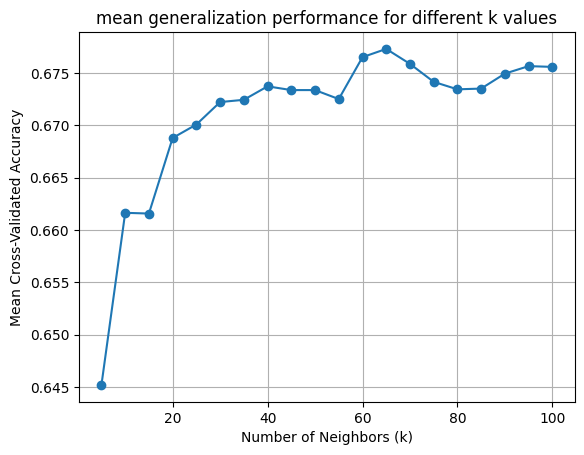

In [172]:
mean_scores = grid_search.cv_results_['mean_test_score']
plt.plot(param_grid['n_neighbors'], mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('mean generalization performance for different k values')
plt.grid(True)
plt.show()

### E) The search process in step (D) has automattically refitted a model, with the best k value found in cross-validation, on the entire training set. Please apply this model to make predictions for the first 5 instances in the test set, display the predicted target labels and probability of "Leave" for each instance. 

In [173]:
predictions = best_knn.predict(X_test_scaled[:5])
probabilities = best_knn.predict_proba(X_test_scaled[:5])[:, 1]
for i in range(5):
    print(f"Instance {i+1}: Predicted label = {predictions[i]}, Probability of 'Leave' = {probabilities[i].round(3)}") 


Instance 1: Predicted label = LEAVE, Probability of 'Leave' = 0.138
Instance 2: Predicted label = STAY, Probability of 'Leave' = 0.554
Instance 3: Predicted label = LEAVE, Probability of 'Leave' = 0.354
Instance 4: Predicted label = LEAVE, Probability of 'Leave' = 0.246
Instance 5: Predicted label = STAY, Probability of 'Leave' = 0.646


## Q2 k-Means

the dataset apartments.csv contains 4 features for 2000 houses in the United States: the number of bedrooms (bedrooms), monthly price (price), the number of amenities (amenities), the rank of the state, which the house is located, according to population size (state_rank).

- Please answer the following questions with Python, report both the codes and the outputs clearly. 

### A) load the data into Python, check the statistic summary of all features. 

In [174]:
apartaments = pd.read_csv('apartments.csv', sep = ',')
apartaments.describe().round(3)

,bedrooms,price,amenities,state_rank
count,2000.000,2000.000,2000.000,2000.000
mean,1.524,2058.214,6.896,2.088
std,0.855,1385.546,2.771,1.344
min,0.000,505.000,0.000,0.000
25%,1.000,1150.000,5.000,1.000
50%,2.000,1563.000,7.000,2.000
75%,2.000,2572.500,8.000,4.000
max,5.000,8500.000,13.000,4.000


### B) Please scale all features with MinMaxScaler, check the statistical summary of all scaled features. 

In [175]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(apartaments)
scaled_apartaments = pd.DataFrame(scaled_features, columns=apartaments.columns)
scaled_apartaments.describe().round(3)

,bedrooms,price,amenities,state_rank
count,2000.000,2000.000,2000.000,2000.000
mean,0.305,0.194,0.530,0.522
std,0.171,0.173,0.213,0.336
min,0.000,0.000,0.000,0.000
25%,0.200,0.081,0.385,0.250
50%,0.400,0.132,0.538,0.500
75%,0.400,0.259,0.615,1.000
max,1.000,1.000,1.000,1.000


### C) Apply the k-Means algorithm to group all houses into 3 clusters, set random state as 2025. 

- How many iterations did the model take to converge?

In [176]:
kmeans = KMeans(n_clusters=3, random_state=2025)
kmeans.fit(scaled_apartaments)
kmeans.n_iter_
print("Number of iterations to converge:", kmeans.n_iter_)

Number of iterations to converge: 5


### D) Check the cluster centroids returned by the model in step (C), describe the difference of the three clusters according to the feature values for their centroids. 

In [177]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_apartaments.columns)
centroids_round = centroids.round(3)
centroids_round

,bedrooms,price,amenities,state_rank
0,0.243,0.156,0.432,0.339
1,0.345,0.109,0.525,0.924
2,0.382,0.461,0.792,0.186


- Answer: 

    0) Cluster #0 can be described as apartments with fewer bedrooms, fewer amenities, in a fairly densly populated state, which can explain why they command a considerable premium (monthly payment). 

    1) Cluster #1 can be described as apartments with more bedrooms, decent amount of amenities, but since they are in less densly populated states, they are the cheapest.
    
    3) Cluster #2 can be described as apartments with more bedrooms, the most amount of amenities, and in a highly popultaed state, which might explain why their price is also the highest. 

### E) With this dataset, how many clusters shall we separate those houses into?  

#### Please use the elbow method to choose the best k-value from a list of integrs in the range of 1 (inclusive) and 30 (inclusive). Set random state as 2025 in the process. Visualize the relationship between k-value and the clustering quality with a line plot.

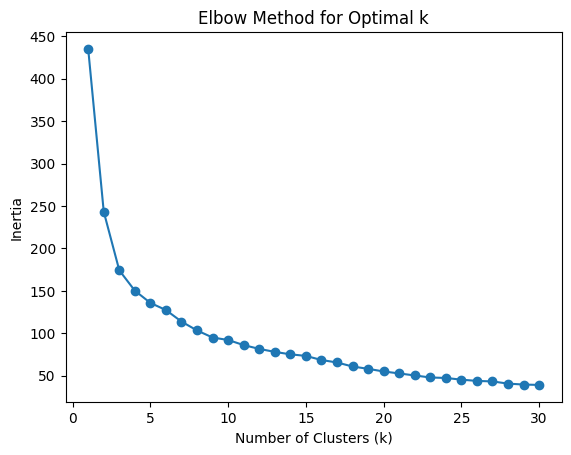

From the elbow plot, we can see that the optimal number of clusters is around k=9, as it starts to decrease at a slower rate beyond this point.


In [178]:
inertia_values = []
k_values = range(1, 31)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2025)
    kmeans.fit(scaled_apartaments)
    inertia_values.append(kmeans.inertia_)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
print("From the elbow plot, we can see that the optimal number of clusters is around k=9, as it starts to decrease at a slower rate beyond this point.")

#### Explain your answer

- Answer: 

    Our main goal is to group ("cluster) similar apartments so we can gain information and act on it. Even though we want every apartment to actually be similar to the others in its group, we still want valuable insights out of the groups themselves (otherwise we will just make 2000 groups or "k-values"), therefore the elbow method help us balance insights with similarty in the clusters, keeping enough clusters to be both useful and similar. 

## Q3 Model Evaluation

Table 1 a confusion matriz generated by Model A on a test set with 100,000 instances (each representing a customer). The notation p and n represent the actual target values, while Y and N represent the target values predicted by Model A. 

In [179]:
confusion_matrix = pd.DataFrame({
    'Predicted Y': [52000, 8000],
    'Predicted N': [8000, 32000]
}, index=['Actual p', 'Actual n'])
confusion_matrix   

,Predicted Y,Predicted N
Actual p,52000,8000
Actual n,8000,32000


Note that the marketing team will target a customer with special offers only if he or she is predicted to be positive (i.e. Y) Suppose that a true positive prediction yields $10, also a false positive prediction yields -$2, and there is no loss nor benefit for negative predictions. 

In [180]:
cost_benefit_matrix = pd.DataFrame({
    'Predicted Y': [10, -2],
    'Predicted N': [0, 0]
}, index=['Actual p', 'Actual n'])
cost_benefit_matrix

,Predicted Y,Predicted N
Actual p,10,0
Actual n,-2,0


### A) Calculate the expected value for Model A per person. Show the calculations steps clearly. 

In [181]:
TP = 52000
FP = 8000
TN = 32000
FN = 8000
EV_A = (TP * 10 + FP * -2 + TN * 0 + FN * 0) / (TP + FP + TN + FN)
print("Expected value for Model A per person:", EV_A)

Expected value for Model A per person: 5.04


### B) Write down the confusion matrix for the majority model. 

Majority model is either an "All-No model" if n is the majority or "All-Yes model" if p is the majority. 

In [182]:
confusion_matrix_majority = pd.DataFrame({
    'Predicted Y': [60000, 40000], 
    'Predicted N': [0, 0]
}, index=['Actual p', 'Actual n'])
confusion_matrix_majority

,Predicted Y,Predicted N
Actual p,60000,0
Actual n,40000,0


### C) Calculate the expected value for the majority model. Show the calculation steps clearly. 

In [183]:
EV_majority = (60000 * 10 + 40000 * -2) / (60000 + 40000)
print("Expected value for Majority Model per person:", EV_majority) 

Expected value for Majority Model per person: 5.2


### D) Assume the marketing team will make the same number of special offers as displayed in the Table. Write down the confusion matrix for the random model. 

In [184]:
confusion_matrix_random = pd.DataFrame({
    'Predicted Y': [30000, 30000],
    'Predicted N': [20000, 20000]
}, index=['Actual p', 'Actual n'])
confusion_matrix_random

,Predicted Y,Predicted N
Actual p,30000,20000
Actual n,30000,20000


### E) Calculate the expected value for the random model. Show the calculation steps clearly. 

In [185]:
TP_random = 30000
FP_random = 30000
TN_random = 20000
FN_random = 20000
EV_random = (TP_random * 10 + FP_random * -2 + TN_random * 0 + FN_random * 0) / (TP_random + FP_random + TN_random + FN_random)
print("Expected value for Random Model per person:", EV_random)

Expected value for Random Model per person: 2.4


## Q4 Naive Bayes

Use table 2 to answer the following questions. 

In [186]:
Table2 = pd.DataFrame({
    'Color'   : ['Red', 'Red', 'Red', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Red', 'Red'],
    'Type'    : ['Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'SUV', 'SUV', 'SUV', 'SUV', 'Sports'],
    'Origin'  : ['Domestic', 'Domestic', 'Domestic', 'Domestic', 'Imported', 'Imported', 'Imported', 'Domestic', 'Imported', 'Imported'],
    'Stolen'  : ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']
})
Table2

,Color,Type,Origin,Stolen
0,Red,Sports,Domestic,Yes
1,Red,Sports,Domestic,No
2,Red,Sports,Domestic,Yes
3,Yellow,Sports,Domestic,No
4,Yellow,Sports,Imported,Yes
5,Yellow,SUV,Imported,No
6,Yellow,SUV,Imported,Yes
7,Yellow,SUV,Domestic,No
8,Red,SUV,Imported,No
9,Red,Sports,Imported,Yes


### A) Compute the six conditional probabilities bellow:

#### a. P(Red | Yes)

In [187]:
P_Red_and_Yes = len(Table2[(Table2['Color'] == 'Red') & (Table2['Stolen'] == 'Yes')])
P_Yes = len(Table2[Table2['Stolen'] == 'Yes'])
P_Red_given_Yes = P_Red_and_Yes / P_Yes
P_Red_given_Yes

0.6

#### b. P(Red | No)

In [188]:
P_Red_and_No = len(Table2[(Table2['Color'] == 'Red') & (Table2['Stolen'] == 'No')])
P_No = len(Table2[Table2['Stolen'] == 'No'])
P_Red_given_No = P_Red_and_No / P_No
P_Red_given_No

0.4

#### c. P(SUV | Yes)

In [189]:
P_SUV_and_Yes = len(Table2[(Table2['Type'] == 'SUV') & (Table2['Stolen'] == 'Yes')])
P_Yes = len(Table2[Table2['Stolen'] == 'Yes'])
P_SUV_given_Yes = P_SUV_and_Yes / P_Yes
P_SUV_given_Yes

0.2

#### d. P(SUV | No)

In [190]:
P_SUV_and_No = len(Table2[(Table2['Type'] == 'SUV') & (Table2['Stolen'] == 'No')])
P_No = len(Table2[Table2['Stolen'] == 'No'])
P_SUV_given_No = P_SUV_and_No / P_No
P_SUV_given_No

0.6

#### e. P(Domestic | Yes)

In [191]:
P_Domestic_and_Yes = len(Table2[(Table2['Origin'] == 'Domestic') & (Table2['Stolen'] == 'Yes')])
P_Yes = len(Table2[Table2['Stolen'] == 'Yes'])
P_Domestic_given_Yes = P_Domestic_and_Yes / P_Yes
P_Domestic_given_Yes

0.4

#### f. P(Domestic | No)

In [192]:
P_Domestic_and_No = len(Table2[(Table2['Origin'] == 'Domestic') & (Table2['Stolen'] == 'No')])
P_No = len(Table2[Table2['Stolen'] == 'No'])
P_Domestic_given_No = P_Domestic_and_No / P_No
P_Domestic_given_No

0.6

### According to Naive Bayes rule, what is the probability for a Red Domestic SUV to be stolen?

Compute the conditional Probability for both classes (Yes, No) and state your answer regarding the predicted result accordingly. 

#### g. P(Yes | Red Domestic SUV)

In [193]:
P_Red_and_Domestic_and_SUV_and_Yes = len(Table2[(Table2['Color'] == 'Red') & (Table2['Origin'] == 'Domestic') & (Table2['Type'] == 'SUV') & (Table2['Stolen'] == 'Yes')])
P_Yes = len(Table2[Table2['Stolen'] == 'Yes'])
P_Yes_given_Red_Domestic_SUV = P_Red_and_Domestic_and_SUV_and_Yes / P_Yes
P_Yes_given_Red_Domestic_SUV

0.0

#### h. P(No | Red Domestic SUV)

In [194]:
P_Red_and_Domestic_and_SUV_and_No = len(Table2[(Table2['Color'] == 'Red') & (Table2['Origin'] == 'Domestic') & (Table2['Type'] == 'SUV') & (Table2['Stolen'] == 'No')])
P_No = len(Table2[Table2['Stolen'] == 'No'])
P_No_given_Red_Domestic_SUV = P_Red_and_Domestic_and_SUV_and_No / P_No
P_No_given_Red_Domestic_SUV

0.0

#### i. Based on (g) and (h), will a Red Domestic SUV get stolen?

- Answer:
    
    We have no instances where that has happened before, but since half of the vehicles get stolen, I will make an educated guess that this new car will get stolen (because I am a pessimist, but it was 50% chance)

## Q5 Association Rules

The data shopping_basket.csv contains 7501 transaction records of 119 different items for a store. 

Please complete the following tasks with Python, report both the codes and outputs clearly. 

### A) Please load the data in Python and display the first five rows. 

In [195]:
shopping = pd.read_csv('shopping_basket.csv')
print(shopping.head())

   asparagus  almonds  antioxydant_juice  avocado  babies_food  bacon  \
0      False     True               True     True        False  False   
1      False    False              False    False        False  False   
2      False    False              False    False        False  False   
3      False    False              False     True        False  False   
4      False    False              False    False        False  False   

   barbecue_sauce  black_tea  blueberries  body_spray  ...  turkey  \
0           False      False        False       False  ...   False   
1           False      False        False       False  ...   False   
2           False      False        False       False  ...   False   
3           False      False        False       False  ...    True   
4           False      False        False       False  ...   False   

   vegetables_mix  water_spray  white_wine  whole_weat_flour  \
0            True        False       False              True   
1           

### B) Extract frecuent itemsets from the dataset with min_support = .01.

How many frequent itemsets will be generated?

In [196]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(shopping, min_support=0.01, use_colnames=True)
num_frequent_itemsets = len(frequent_itemsets)
print("The number of frequent itemsets generated is:", num_frequent_itemsets)

The number of frequent itemsets generated is: 257


### C) What itemset has the highest support? 

In [197]:
highest_support_itemset = frequent_itemsets.loc[frequent_itemsets['support'].idxmax()]
print("Itemset with the highest support:")
print(highest_support_itemset)

Itemset with the highest support:
support            0.238368
itemsets    (mineral_water)
Name: 46, dtype: object


#### How do you interpret support value?

- Answer: 

    Mineral Water appear on 23.83% of transactions, making it the most popular item.

### D) With the frequent itemsets generated in steb (B), please generate association rules with lift as the evaluation metric and min_threshold = 1. 

In [198]:
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
association_rules_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral_water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
1,(mineral_water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,1.0,0.003654,1.016113,0.413630,0.044593,0.015857,0.198329
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,1.0,0.004398,1.058080,0.420238,0.073129,0.054892,0.136473
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,1.0,0.004398,1.063198,0.417434,0.073129,0.059442,0.136473
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,1.0,0.002779,1.018933,0.194767,0.072934,0.018581,0.149934


#### How many rules will be generated?

In [199]:
num_rules = len(association_rules_df)
print("The number of association rules generated is:", num_rules)

The number of association rules generated is: 406


#### Display the top 5 association rules according to their confidence and lift values respectively. 

In [200]:
top5_confidence = association_rules_df.sort_values(by='confidence', ascending=False).head(5)
print("Top 5 association rules by confidence:")
print(top5_confidence)

Top 5 association rules by confidence:
                   antecedents      consequents  antecedent support  \
343        (ground_beef, eggs)  (mineral_water)            0.019997   
376        (milk, ground_beef)  (mineral_water)            0.021997   
319   (ground_beef, chocolate)  (mineral_water)            0.023064   
365  (milk, frozen_vegetables)  (mineral_water)            0.023597   
273                     (soup)  (mineral_water)            0.050527   

     consequent support   support  confidence      lift  representativity  \
343            0.238368  0.010132    0.506667  2.125563               1.0   
376            0.238368  0.011065    0.503030  2.110308               1.0   
319            0.238368  0.010932    0.473988  1.988472               1.0   
365            0.238368  0.011065    0.468927  1.967236               1.0   
273            0.238368  0.023064    0.456464  1.914955               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczyns

In [201]:
top5_lift = association_rules_df.sort_values(by='lift', ascending=False).head(5)
print("Top 5 association rules by lift:")
print(top5_lift)

Top 5 association rules by lift:
                    antecedents                 consequents  \
215             (herb_&_pepper)               (ground_beef)   
214               (ground_beef)             (herb_&_pepper)   
385               (ground_beef)  (mineral_water, spaghetti)   
384  (mineral_water, spaghetti)               (ground_beef)   
397                 (olive_oil)  (mineral_water, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
215            0.049460            0.098254  0.015998    0.323450  3.291994   
214            0.098254            0.049460  0.015998    0.162822  3.291994   
385            0.098254            0.059725  0.017064    0.173677  2.907928   
384            0.059725            0.098254  0.017064    0.285714  2.907928   
397            0.065858            0.059725  0.010265    0.155870  2.609786   

     representativity  leverage  conviction  zhangs_metric   jaccard  \
215               1.0  0.011138    1.3328

### E) between lift and confidence, which metric is more useful to measure the relationship of those frequent itemsets? Why?

- Answer:

    Lift

    Why:

        Even though confidence gives us the probability of things being together, is lift the one that actually shows a link between the 2, taking base probability out of the picture, driving more valuable insights. 